In [74]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
%autoreload 2

In [76]:
import matplotlib.pyplot as plt
import uproot_methods

In [77]:
import libwwz
libwwz.config.year = 2018

In [78]:
import uproot
import os
import numpy as np
import pandas as pd

In [79]:
from geeksw.utils.core import concatenate
from geeksw.utils.data_loader_tools import make_data_loader, TreeWrapper, list_root_files_recursively

In [80]:
import pyarrow.parquet as pq
import pandas as pd

In [81]:
_dataset_wz = pq.ParquetDataset("/scratch/skims/mc/2018/WZ/four_lepton_skim/parquet")
df_full_wz = _dataset_wz.read_pandas().to_pandas()

In [82]:
_dataset = pq.ParquetDataset("/home/llr/cms/rembser/WWZ-leptonic-EFT-analysis/skims/2018_WWZ_dim8_four_lepton_skim/parquet")
df_full = _dataset.read_pandas().to_pandas()

In [83]:
df_wz = libwwz.four_lepton_analysis.four_lepton_analysis(df_full_wz, use_z_id_as_w_id=False)

In [84]:
df = libwwz.four_lepton_analysis.four_lepton_analysis(df_full, use_z_id_as_w_id=False)

In [104]:
df.groupby("category")["genWeight"].count()

category
EMu               476
OffZ              452
OnZ                49
uncategorized    7808
Name: genWeight, dtype: int64

In [86]:
df_full['VetoLepton_pt_0'].isna().sum()

0

In [148]:
missing_factor = 1.
df["weight"] = df["genWeight"] * 157. / 583156.50390625 * 165.1 * missing_factor
df_wz["weight"] = df_wz["genWeight"] * 157. / 96752136.5 * 4429.7

In [149]:
x = np.array([-10, -5.0, 0, 5.0, 10])
xx = np.linspace(-10, 10, 200)
EFT_FT0_0p2 = np.zeros(len(df))
for i, y in enumerate(df[["EFT_FT0_m10", "EFT_FT0_m5", "EFT_SM", "EFT_FT0_5", "EFT_FT0_10"]].values):
    #print()
    p = np.polyfit(x, y, 2)
    EFT_FT0_0p2[i] = np.polyval(p, [0.2])
df["EFT_FT0_0p2"] = EFT_FT0_0p2

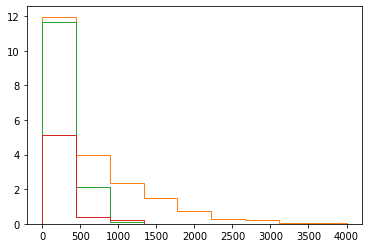

In [151]:
bins = np.linspace(0, 4000, 10)
df_q = df.query("category == 'EMu'")
df_q_wz = df_wz.query("category == 'EMu'")

plt.hist(df_q["veto_lepton_pt_sum"],
         bins=bins,
         weights=df_q["weight"],
         histtype="step")
plt.hist(df_q["veto_lepton_pt_sum"],
         bins=bins,
         weights=df_q["weight"] * df_q["EFT_FT0_5"],
         histtype="step")
plt.hist(df_q["veto_lepton_pt_sum"],
         bins=bins,
         weights=df_q["weight"] * df_q["EFT_FT0_0p2"],
         histtype="step")

plt.hist(df_q_wz["veto_lepton_pt_sum"],
         bins=bins,
         weights=df_q_wz["weight"],
         histtype="step")
#plt.yscale('log', nonposy='clip')
plt.show()

In [145]:
df["veto_lepton_pt_sum"]

0       1927.396149
1       1365.971344
2        487.534369
3       1801.294731
4        277.286350
           ...     
8780    1676.833584
8781    1938.130524
8782     574.799183
8783     238.851397
8784     227.095367
Name: veto_lepton_pt_sum, Length: 8785, dtype: float64